In [1]:
import nltk
from nltk.corpus.reader.plaintext import *
#from nltk.corpus import stopwords
import collections
from nltk.util import ngrams

from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import os

In [2]:
corpus = PlaintextCorpusReader('Z:\\Documents\\Son Reader\\Corpus', '.*\.txt')

In [3]:
def wordCount (text, word, verbose=False):
    
    #tokenize the text into words and turn it into a counter
    cnt = Counter(word_tokenize(corpus.raw(text).lower()))
    total = 0
    
    #cycle through all words to find a match
    for key in cnt:
        if key == word:
            if verbose:
                print (">>>>> Just found ") + str(key) + str(" in ") + str(text) 
            total += cnt[key]
            if verbose:
                print (">>>>> Total is ") + str(total)
    return total


In [4]:
def bigramCount (text, bigram, verbose=False):
    
    #tokenize the text into lower case words
    words = word_tokenize(corpus.raw(text).lower())
    
    #convert into pairs
    pairs = [ " ".join(pair) for pair in nltk.bigrams(words)]
        
    # run through the pairs to find matches
    cnt = Counter(pairs)
    total = 0
    for key in cnt:
        if key == bigram:
            if verbose:
                print (">>>>> Just found ") + str(key) + str(" in ") + str(text) 
            total += cnt[key]
            if verbose:
                print (">>>>> Total is ") + str(total)
    return total



In [5]:
def trigramCount (text, trigram, verbose=False):
    
    #tokenize the text into lower case words
    words = word_tokenize(corpus.raw(text).lower())
    
    #convert into pairs
    triplets = [ " ".join(triplet) for triplet in nltk.trigrams(words)]
        
    # run through the pairs to find matches
    cnt = Counter(triplets)
    total = 0
    for key in cnt:
        if key == trigram:
            if verbose:
                print (">>>>> Just found ") + str(key) + str(" in ") + str(text) 
            total += cnt[key]
            if verbose:
                print (">>>>> Total is ") + str(total)
    return total




In [6]:
def countsByKeyword (corpus, keyword_cohorts, verbose=False):

    # keyword_cohort is a list of single-, two- and three-word keywords
    # corpus is a NLTK collection of text files
    
    # the final dictionary in the form of {"Date": ["cohort", total]}
    counts = collections.OrderedDict()
    for fname in corpus.fileids():
        counts[fname[:7]] = {}

    
    #cycles through each cohort
    for cohort in keyword_cohorts:
        
        if verbose:
            print ("Examining ") + str(cohort) + str(" cohort")

        for date in counts.keys():
            counts[date][cohort] = 0
        
        #cycles through keywords in a cohort
        for keyword in keyword_cohorts[cohort]:
            if verbose:
                print (">>> Now counting ") + str(keyword)
            
            # if the keyword is a bigram
            if len(word_tokenize(keyword))==2:
                #cycles through the corpus, finding totals for each documents
                for fname in corpus.fileids():
                    counts[fname[:7]][cohort] += bigramCount(fname, keyword, verbose = verbose)

            # if the keyword is a trigram
            elif len(word_tokenize(keyword))==3:
                #cycles through the corpus, finding totals for each documents
                for fname in corpus.fileids():
                    counts[fname[:7]][cohort]  += trigramCount(fname, keyword, verbose = verbose)

            #if the keyword is a single  
            else:
                for fname in corpus.fileids():
                    counts[fname[:7]][cohort]  += wordCount(fname, keyword, verbose = verbose)

    
    #last, add the total count per document
    for fname in corpus.fileids():
        cnt = Counter(word_tokenize(corpus.raw(fname).lower()))
        counts[fname[:7]]["word_total"]  = sum(cnt.values())
            
    return counts

In [7]:
def we_will_melt_a_data_frame_of_you_yet(count_results, column_totals):
    
    # count results = dict in the form of {"Date": ["cohort", total]}
    # totals = dict in the form of {"total_name": [count_results column names]}

    df = pd.DataFrame(count_results).T
    df.reset_index(level=0, inplace=True)
    
    new_df = pd.DataFrame()
    new_df["dates"] = df["index"]
    for key in column_totals:
        new_df[key] = 0
        for item in column_totals[key]:
            new_df[key] += df[item]
    
    melted_df = new_df.melt("dates", var_name="topic", value_name="count")
    return melted_df

In [29]:
keyword_cohorts = {
            "internet_related":["internet"], 
            "mobile_internet_related":["mobile internet"],
            "smartphone_related":["smartphone"], 
            "iphone_related":["iphone"],
            "sprint_related":["sprint", "marcelo", "t-mobile", "at&t", "verizon", "deutsche telekom"], 
            "ai_related":["artificial intelligence", "machine learning", "ai", "deep learning", 
                          "machine intelligence", "super intelligence", "superintelligence"],
            "iot_related":["internet of things", "iot", "connected devices"], 
            "robot_related":["robot", "robots", "robotics", "boston dynamics", "aldebaran", "schaft"],
            "singularity_related":["singularity"]
                  }

In [31]:
results = countsByKeyword(corpus, keyword_cohorts, verbose=False)

In [36]:
df = pd.DataFrame(results).T
df["futuristic_total"] = df["ai_related"]+df["iot_related"]+df["robot_related"]+df["singularity_related"]

# AI, IOT and singularity are Son's favorite topic these days. Turns out it's a relatively recent one.

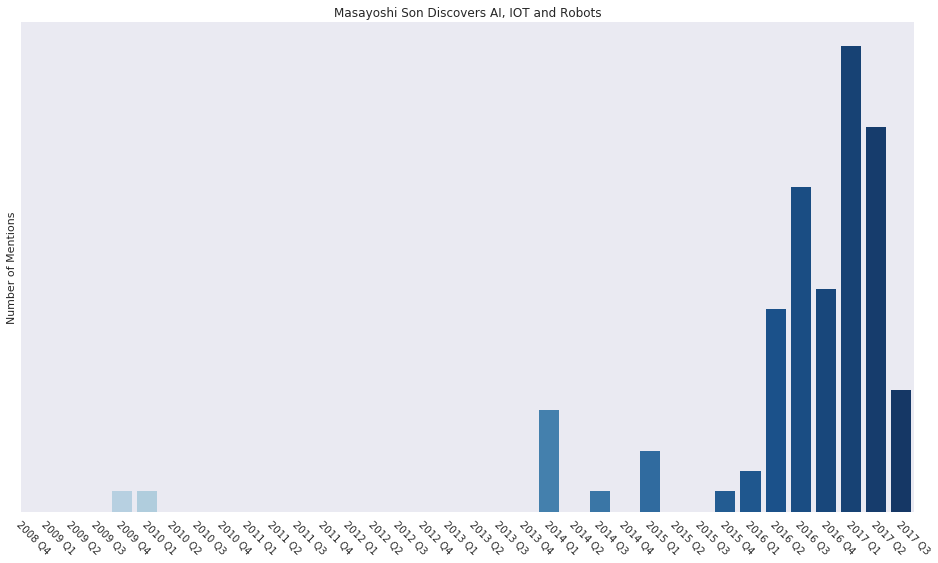

In [38]:
with sns.axes_style("white"):
    sns.set(rc={"figure.figsize": (16, 9)})
    index = df.index
    sns.barplot(x = index, y="futuristic_total", data = df, palette = "Blues")
    plt.xlim(10, None)
    plt.xticks(rotation=-45, rotation_mode = "anchor", horizontalalignment = "left")
    plt.yticks([])
    plt.ylabel("Number of Mentions")
    plt.title("Masayoshi Son Discovers AI, IOT and Robots")

# The acquisition of ARM in 2016 Q is when he really glomes onto the topic in his earnings briefings. AI and IOT are the biggest categories.

# Here's how much of it is about AI

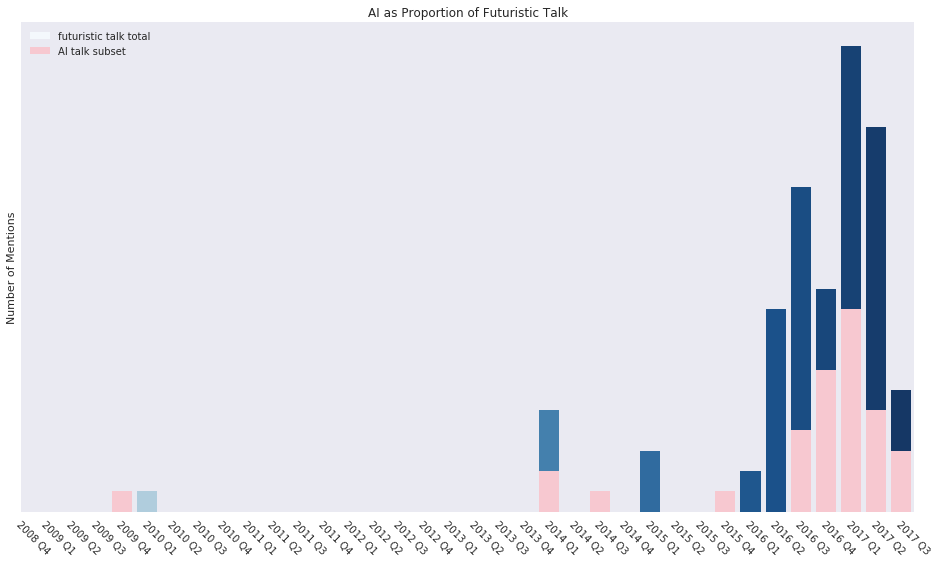

In [45]:
with sns.axes_style("white"):
    sns.set(rc={"figure.figsize": (16, 9)})
    index = df.index
    sns.barplot(x = index, y="futuristic_total", data = df, palette = "Blues", label = "futuristic talk total")
    bottom_plot = sns.barplot(x = index, y =df["ai_related"], color = "pink", label = "AI talk subset")
    topbar = plt.Rectangle((0,0),1,1, fc="red", edgecolor = 'none')
    bottombar = plt.Rectangle((0,0),1,1, fc='#0000A3', edgecolor = 'none')
    plt.legend(loc='upper left')
    plt.xlim(10, None)
    plt.xticks(rotation=-45, rotation_mode = "anchor", horizontalalignment = "left")
    plt.yticks([])
    plt.ylabel("Number of Mentions")
    plt.title("AI as Proportion of Futuristic Talk")

# And here's the proportion for IOT

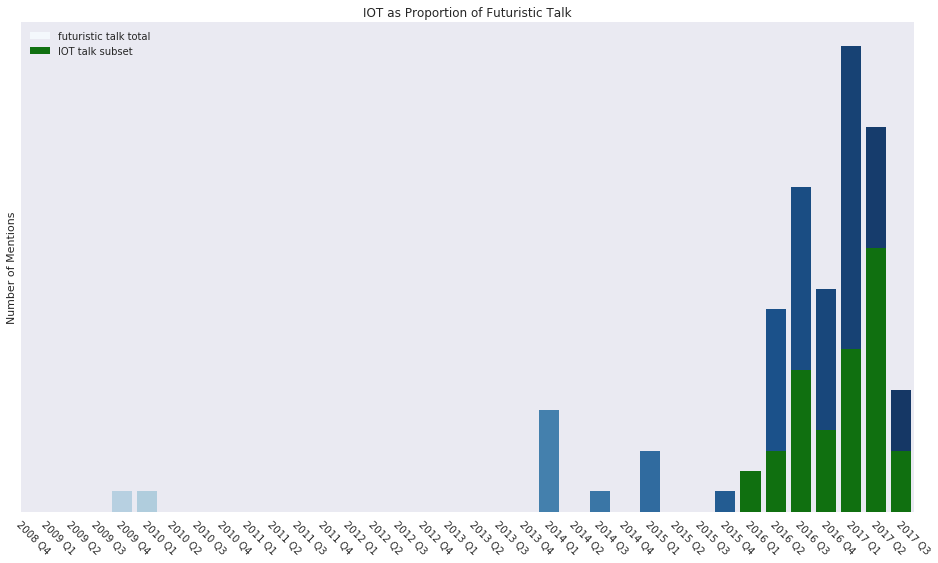

In [44]:
with sns.axes_style("white"):
    sns.set(rc={"figure.figsize": (16, 9)})
    index = df.index
    sns.barplot(x = index, y="futuristic_total", data = df, palette = "Blues", label = "futuristic talk total")
    bottom_plot = sns.barplot(x = index, y =df["iot_related"], color = "green", label = "IOT talk subset")
    topbar = plt.Rectangle((0,0),1,1, fc="red", edgecolor = 'none')
    bottombar = plt.Rectangle((0,0),1,1, fc='#0000A3', edgecolor = 'none')
    plt.xlim(10, None)
    plt.xticks(rotation=-45, rotation_mode = "anchor", horizontalalignment = "left")
    plt.yticks([])
    plt.legend(loc='upper left')
    plt.ylabel("Number of Mentions")
    plt.title("IOT as Proportion of Futuristic Talk")

# For many years before, Son's hobby horse was the Internet.

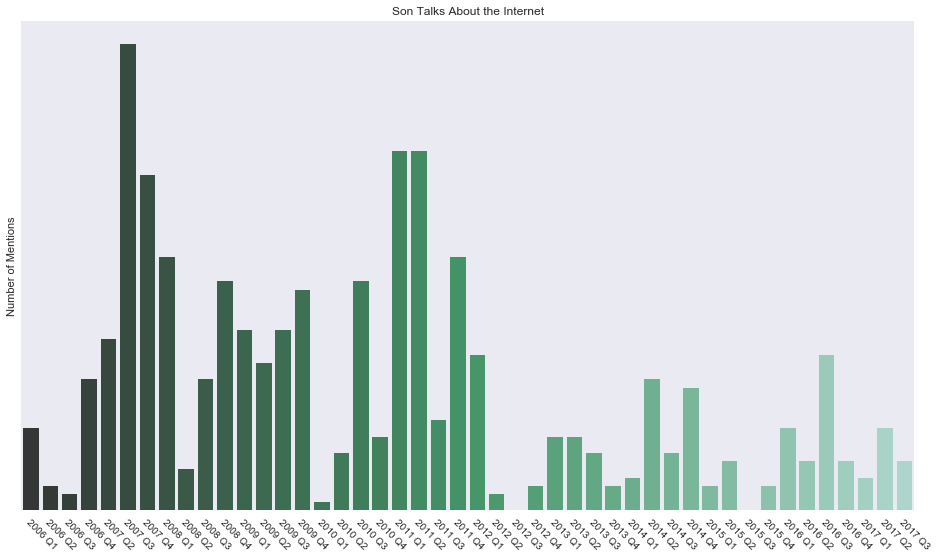

In [56]:
with sns.axes_style("white"):
    sns.set(rc={"figure.figsize": (16, 9)})
    index = df.index
    sns.barplot(x = index, y="internet_related", data = df, palette = "BuGn_d")
    plt.xticks(rotation=-45, rotation_mode = "anchor", horizontalalignment = "left")
    plt.yticks([])
    plt.ylabel("Number of Mentions")
    plt.title("Son Talks About the Internet")

# With the launch of the iPhone in 2007, Son often spoke about the mobile Internet 

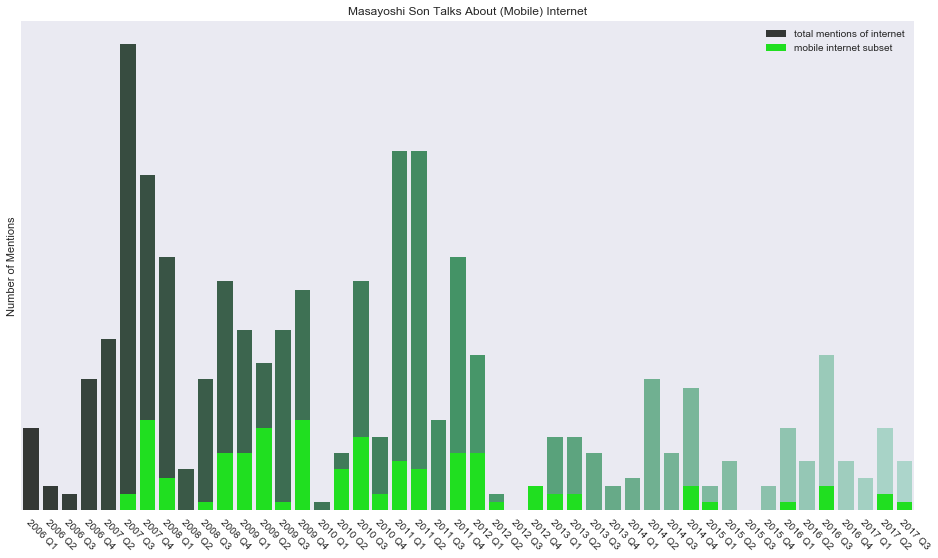

In [60]:
with sns.axes_style("white"):
    sns.set(rc={"figure.figsize": (16, 9)})
    index = df.index
    sns.barplot(x = index, y="internet_related", data = df, palette = "BuGn_d", label = "total mentions of internet")
    bottom_plot = sns.barplot(x = index, y =df["mobile_internet_related"], color = "lime", label = "mobile internet subset")
    topbar = plt.Rectangle((0,0),1,1, fc="red", edgecolor = 'none')
    bottombar = plt.Rectangle((0,0),1,1, fc='#0000A3', edgecolor = 'none')
    plt.xticks(rotation=-45, rotation_mode = "anchor", horizontalalignment = "left")
    plt.yticks([])
    plt.ylabel("Number of Mentions")
    plt.title("Masayoshi Son Talks About (Mobile) Internet")
    plt.legend(loc='upper right')

# The iPhone and Internet side by side

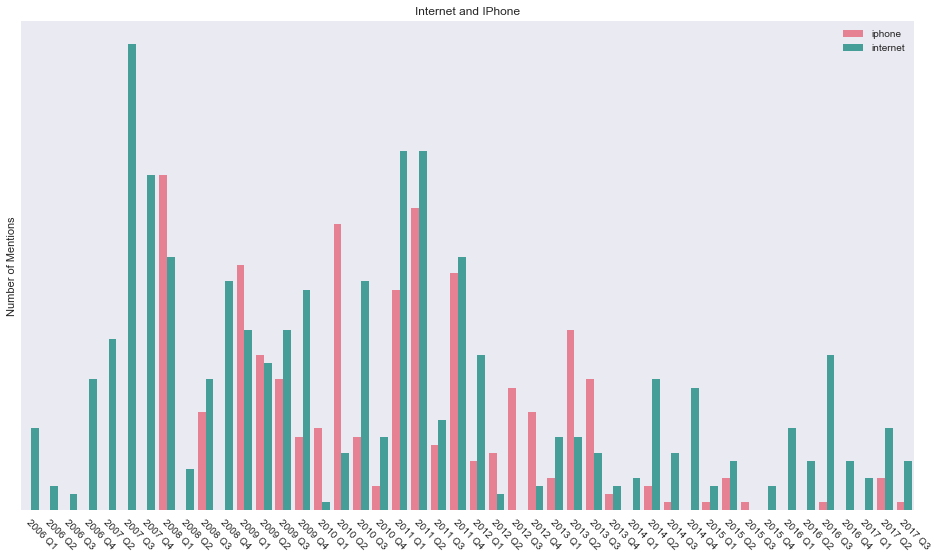

In [63]:
column_totals = {
                "internet":["internet_related"], 
                "iphone":["iphone_related"]                
                 }
melted_df = we_will_melt_a_data_frame_of_you_yet(results, column_totals)

with sns.axes_style("white"):
    sns.set(rc={"figure.figsize": (16, 9)})
    sns.barplot(x = "dates", y="count", hue="topic", data = melted_df, palette="husl")
    plt.xticks(rotation=-45, rotation_mode = "anchor", horizontalalignment = "left")
    plt.yticks([])
    plt.xlabel("")
    plt.ylabel("Number of Mentions")
    plt.title("Internet and IPhone")
    plt.legend(loc='upper right')

# Even though e-commerce companies like Yahoo Japan and Alibaba still account for much Son's wealth and domestic mobile operation is his main cash cow, both topics have waned in frequency in recent years.

# Starting 2012, Sprint became the focus of Son's attention

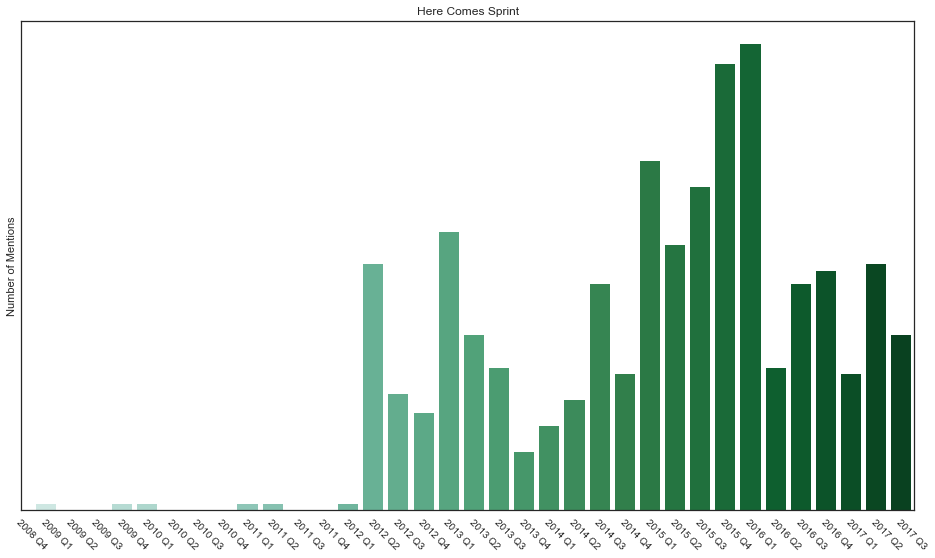

In [68]:
with sns.axes_style("white"):
    sns.barplot(x = index, y="sprint_related", data = df, palette = "BuGn")
    plt.xlim(10, None)
    plt.xticks(rotation=-45, rotation_mode = "anchor", horizontalalignment = "left")
    plt.yticks([])
    plt.ylabel("Number of Mentions")
    plt.title("Here Comes Sprint")

# Here's Sprint compared with Internet

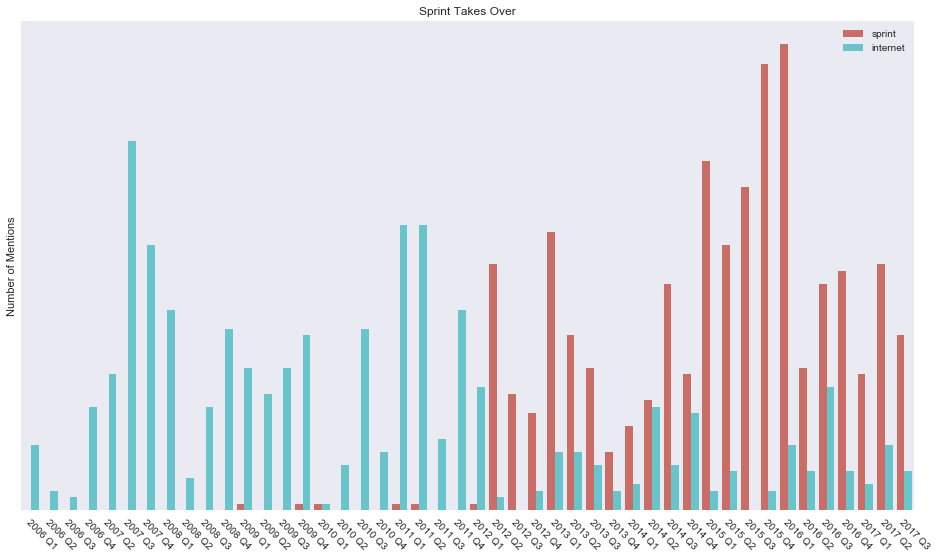

In [69]:
column_totals_2 = {
                "internet":["internet_related"], 
                "sprint":["sprint_related"]                
                 }
melted_df_2 = we_will_melt_a_data_frame_of_you_yet(results, column_totals_2)

with sns.axes_style("white"):
    sns.set(rc={"figure.figsize": (16, 9)})
    sns.barplot(x = "dates", y="count", hue="topic", data = melted_df_2, palette="hls")
    plt.xticks(rotation=-45, rotation_mode = "anchor", horizontalalignment = "left")
    plt.yticks([])
    plt.xlabel("")
    plt.ylabel("Number of Mentions")
    plt.title("Sprint Takes Over")
    plt.legend(loc='upper right')

# This is Sprint and Singularity compared

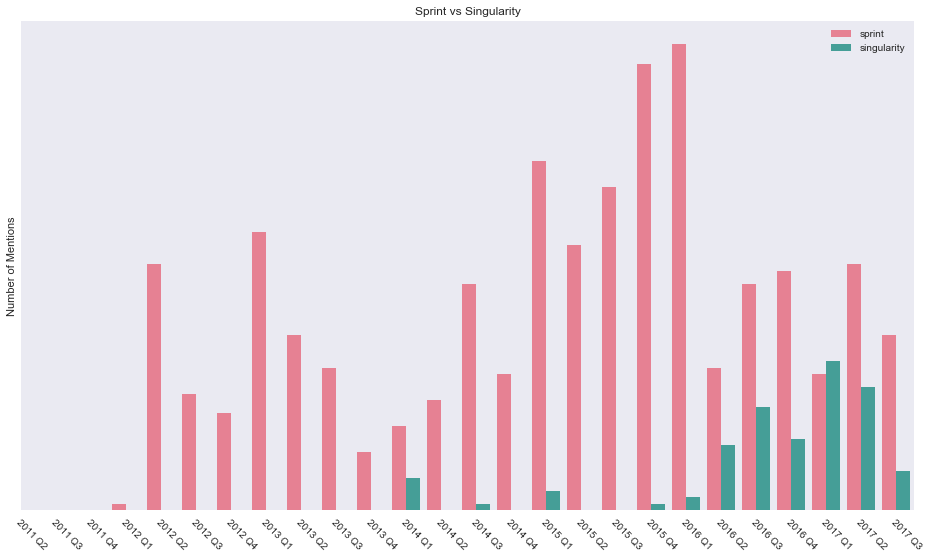

In [83]:
column_totals_3 = {
                "sprint":["sprint_related"], 
                "singularity":["ai_related", "iot_related", "robot_related", "singularity_related"],
                
                 }
melted_df_3 = we_will_melt_a_data_frame_of_you_yet(results, column_totals_3)

with sns.axes_style("white"):
    sns.set(rc={"figure.figsize": (16, 9)})
    sns.barplot(x = "dates", y="count", hue="topic", data = melted_df_3, palette="husl")
    plt.xticks(rotation=-45, rotation_mode = "anchor", horizontalalignment = "left")
    plt.xlim(20, None)
    plt.yticks([])
    plt.xlabel("")
    plt.ylabel("Number of Mentions")
    plt.title("Sprint vs Singularity")
    plt.legend(loc='upper right')